# Character Interaction Graph

This tutorial covers a brief example of how to extract a character interaction graph from text. The text used here is Moby Dick by Herman Melville, which is freely available on Project Gutenberg.

Importing required libraries

In [1]:
import nltk
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize
# import pygraphviz

Downloading the Project Gutenberg and Stopwords corpus provided by NLTK

In [2]:
with open("The DaVinci Code by Brown, Dan (z-lib.org).mobi.txt",  'r', encoding='utf8' ) as f:
    content = f.read()
print(content)


FACT:

The Priory of Sion—a European secret society founded in 1099—is a real organization. In 1975

Paris's Bibliothèque Nationale discovered parchments known as Les Dossiers Secrets, identifying numerous members of the Priory of Sion, including Sir Isaac Newton, Botticelli, Victor Hugo, and Leonardo da Vinci.

The Vatican prelature known as Opus Dei is a deeply devout Catholic sect that has been the topic of recent controversy due to reports of brainwashing, coercion, and a dangerous practice known as

"corporal mortification." Opus Dei has just completed construction of a $47 million World Headquarters at 243 Lexington Avenue in New York City.

All descriptions of artwork, architecture, documents, and secret rituals in this novel are accurate.



Prologue

Louvre Museum, Paris 10:46 P.M.

Renowned curator Jacques Saunière staggered through the vaulted archway of the museum's Grand Gallery. He lunged for the nearest painting he could see, a Caravaggio. Grabbing the gilded frame, the

List out the characters in the book

Here, the list of characters is taken from the [Sparknotes](https://www.sparknotes.com/lit/mobydick/characters/) page. The adjacency matrix is created based on the co-occurrence of these characters in the same sentence.

In [3]:
characters = ['Vittoria Vetra', 'André Vernet', 'Leigh Teabing', 'Silas', 'Jacques Saunière', 'Sophie Neveu', \
            'Rémy Legaludec', 'Robert Langdon', 'Claude Grouard', \
            'Pamela Gettum', 'Jonas Faukman', 'Bezu Fache', 'Simon Edwards', 'Jerome Collet', 'Marie Chauvel', 'Sister Sandrine Bieil', 'Manuel Aringarosa']

In [4]:
print(len(characters))

17


17 characters.

Preprocessing the spaces between the names of characters

In [5]:
'''davinci = ""
for i in characters:
    if '_' in i:
        s = ' '.join(i.split('_'))
        
        content = content.replace(s,i)
'''

sentences = sent_tokenize(content)
(sentences)


['\nFACT:\n\nThe Priory of Sion—a European secret society founded in 1099—is a real organization.',
 "In 1975\n\nParis's Bibliothèque Nationale discovered parchments known as Les Dossiers Secrets, identifying numerous members of the Priory of Sion, including Sir Isaac Newton, Botticelli, Victor Hugo, and Leonardo da Vinci.",
 'The Vatican prelature known as Opus Dei is a deeply devout Catholic sect that has been the topic of recent controversy due to reports of brainwashing, coercion, and a dangerous practice known as\n\n"corporal mortification."',
 'Opus Dei has just completed construction of a $47 million World Headquarters at 243 Lexington Avenue in New York City.',
 'All descriptions of artwork, architecture, documents, and secret rituals in this novel are accurate.',
 'Prologue\n\nLouvre Museum, Paris 10:46 P.M.',
 "Renowned curator Jacques Saunière staggered through the vaulted archway of the museum's Grand Gallery.",
 'He lunged for the nearest painting he could see, a Caravaggi

In [6]:
count = 0
chapters = []
for sent in sentences:
    if ("CHAPTER" in sent and sent[0] == 'C') or "Epilogue" in sent or "CHAPTER 42" in sent:
        sentences.remove(sent)
        count+=1
    elif 'Dan Brown' in sent:
        sentences.remove(sent)
    elif 'Robert-Langdon' in sent:
        sent.replace('Robert-Langdon','Robert Langdon')

print(len(sentences))

12642


Once the text is preprocessed, it is converted into an adjacency matrix, stored as a pandas DataFrame

In [7]:
char_df = pd.DataFrame(0, index=characters, columns=characters)
char_df.head()

,Vittoria Vetra,André Vernet,Leigh Teabing,Silas,Jacques Saunière,Sophie Neveu,Rémy Legaludec,Robert Langdon,Claude Grouard,Pamela Gettum,Jonas Faukman,Bezu Fache,Simon Edwards,Jerome Collet,Marie Chauvel,Sister Sandrine Bieil,Manuel Aringarosa
Vittoria Vetra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
André Vernet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Leigh Teabing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Silas,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Jacques Saunière,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
for sentence in sentences:
    for char1 in characters:
        s1 = char1.split(' ')
        if len(s1)==1:
            s1+=[s1[0]]
        for char2 in characters:
            s2 = char2.split(' ')
            if len(s2)==1:
                s2+=[s2[0]]
            if (char1 != char2):
                if s1[0] in sentence and s2[0] in sentence:
                    #print('c1: ',sentence)
                    char_df[char1][char2] += 1
                elif s1[0] in sentence and s2[1] in sentence:
                    #print('c2: ',sentence)
                    char_df[char1][char2] += 1
                elif s1[1] in sentence and s2[0] in sentence:
                    #print('c3: ',sentence)
                    char_df[char1][char2] += 1
                elif s1[1] in sentence and s2[1] in sentence:
                    #print('c4: ',sentence)
                    char_df[char1][char2] += 1


char_df.head()

,Vittoria Vetra,André Vernet,Leigh Teabing,Silas,Jacques Saunière,Sophie Neveu,Rémy Legaludec,Robert Langdon,Claude Grouard,Pamela Gettum,Jonas Faukman,Bezu Fache,Simon Edwards,Jerome Collet,Marie Chauvel,Sister Sandrine Bieil,Manuel Aringarosa
Vittoria Vetra,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0
André Vernet,0,0,0,0,4,9,0,14,0,0,0,2,0,1,0,0,0
Leigh Teabing,0,0,0,5,5,73,28,115,0,0,0,8,2,1,0,0,1
Silas,0,0,5,0,2,5,17,6,0,0,0,1,0,0,0,4,18
Jacques Saunière,0,4,5,2,0,20,1,47,2,0,0,22,0,3,0,0,0


Creating a NetworkX graph from the adjacency matrix

In [9]:
G = nx.Graph()
G = nx.from_pandas_adjacency(char_df)

# for i in range(len(characters)):
#     for j in range(i+1, len(characters)):
#         char1 = characters[i]
#         char2 = characters[j]
#         if G.has_edge(char1, char2):
#             G[char1][char2]['interactions'] = char_df[char1][char2]

Printing nodes and edges in graph

In [10]:
print("Number of nodes in the graph:", len(G.nodes()))
print("Nodes:", G.nodes())
print()
print("Number of edges in the graph:", len(G.edges()))
print("Edges:", G.edges(data=True))

Number of nodes in the graph: 17
Nodes: ['Vittoria Vetra', 'André Vernet', 'Leigh Teabing', 'Silas', 'Jacques Saunière', 'Sophie Neveu', 'Rémy Legaludec', 'Robert Langdon', 'Claude Grouard', 'Pamela Gettum', 'Jonas Faukman', 'Bezu Fache', 'Simon Edwards', 'Jerome Collet', 'Marie Chauvel', 'Sister Sandrine Bieil', 'Manuel Aringarosa']

Number of edges in the graph: 46
Edges: [('Vittoria Vetra', 'Robert Langdon', {'weight': 2}), ('André Vernet', 'Jacques Saunière', {'weight': 4}), ('André Vernet', 'Sophie Neveu', {'weight': 9}), ('André Vernet', 'Robert Langdon', {'weight': 14}), ('André Vernet', 'Bezu Fache', {'weight': 2}), ('André Vernet', 'Jerome Collet', {'weight': 1}), ('Leigh Teabing', 'Silas', {'weight': 5}), ('Leigh Teabing', 'Jacques Saunière', {'weight': 5}), ('Leigh Teabing', 'Sophie Neveu', {'weight': 73}), ('Leigh Teabing', 'Rémy Legaludec', {'weight': 28}), ('Leigh Teabing', 'Robert Langdon', {'weight': 115}), ('Leigh Teabing', 'Bezu Fache', {'weight': 8}), ('Leigh Teabing

Plotting the graph

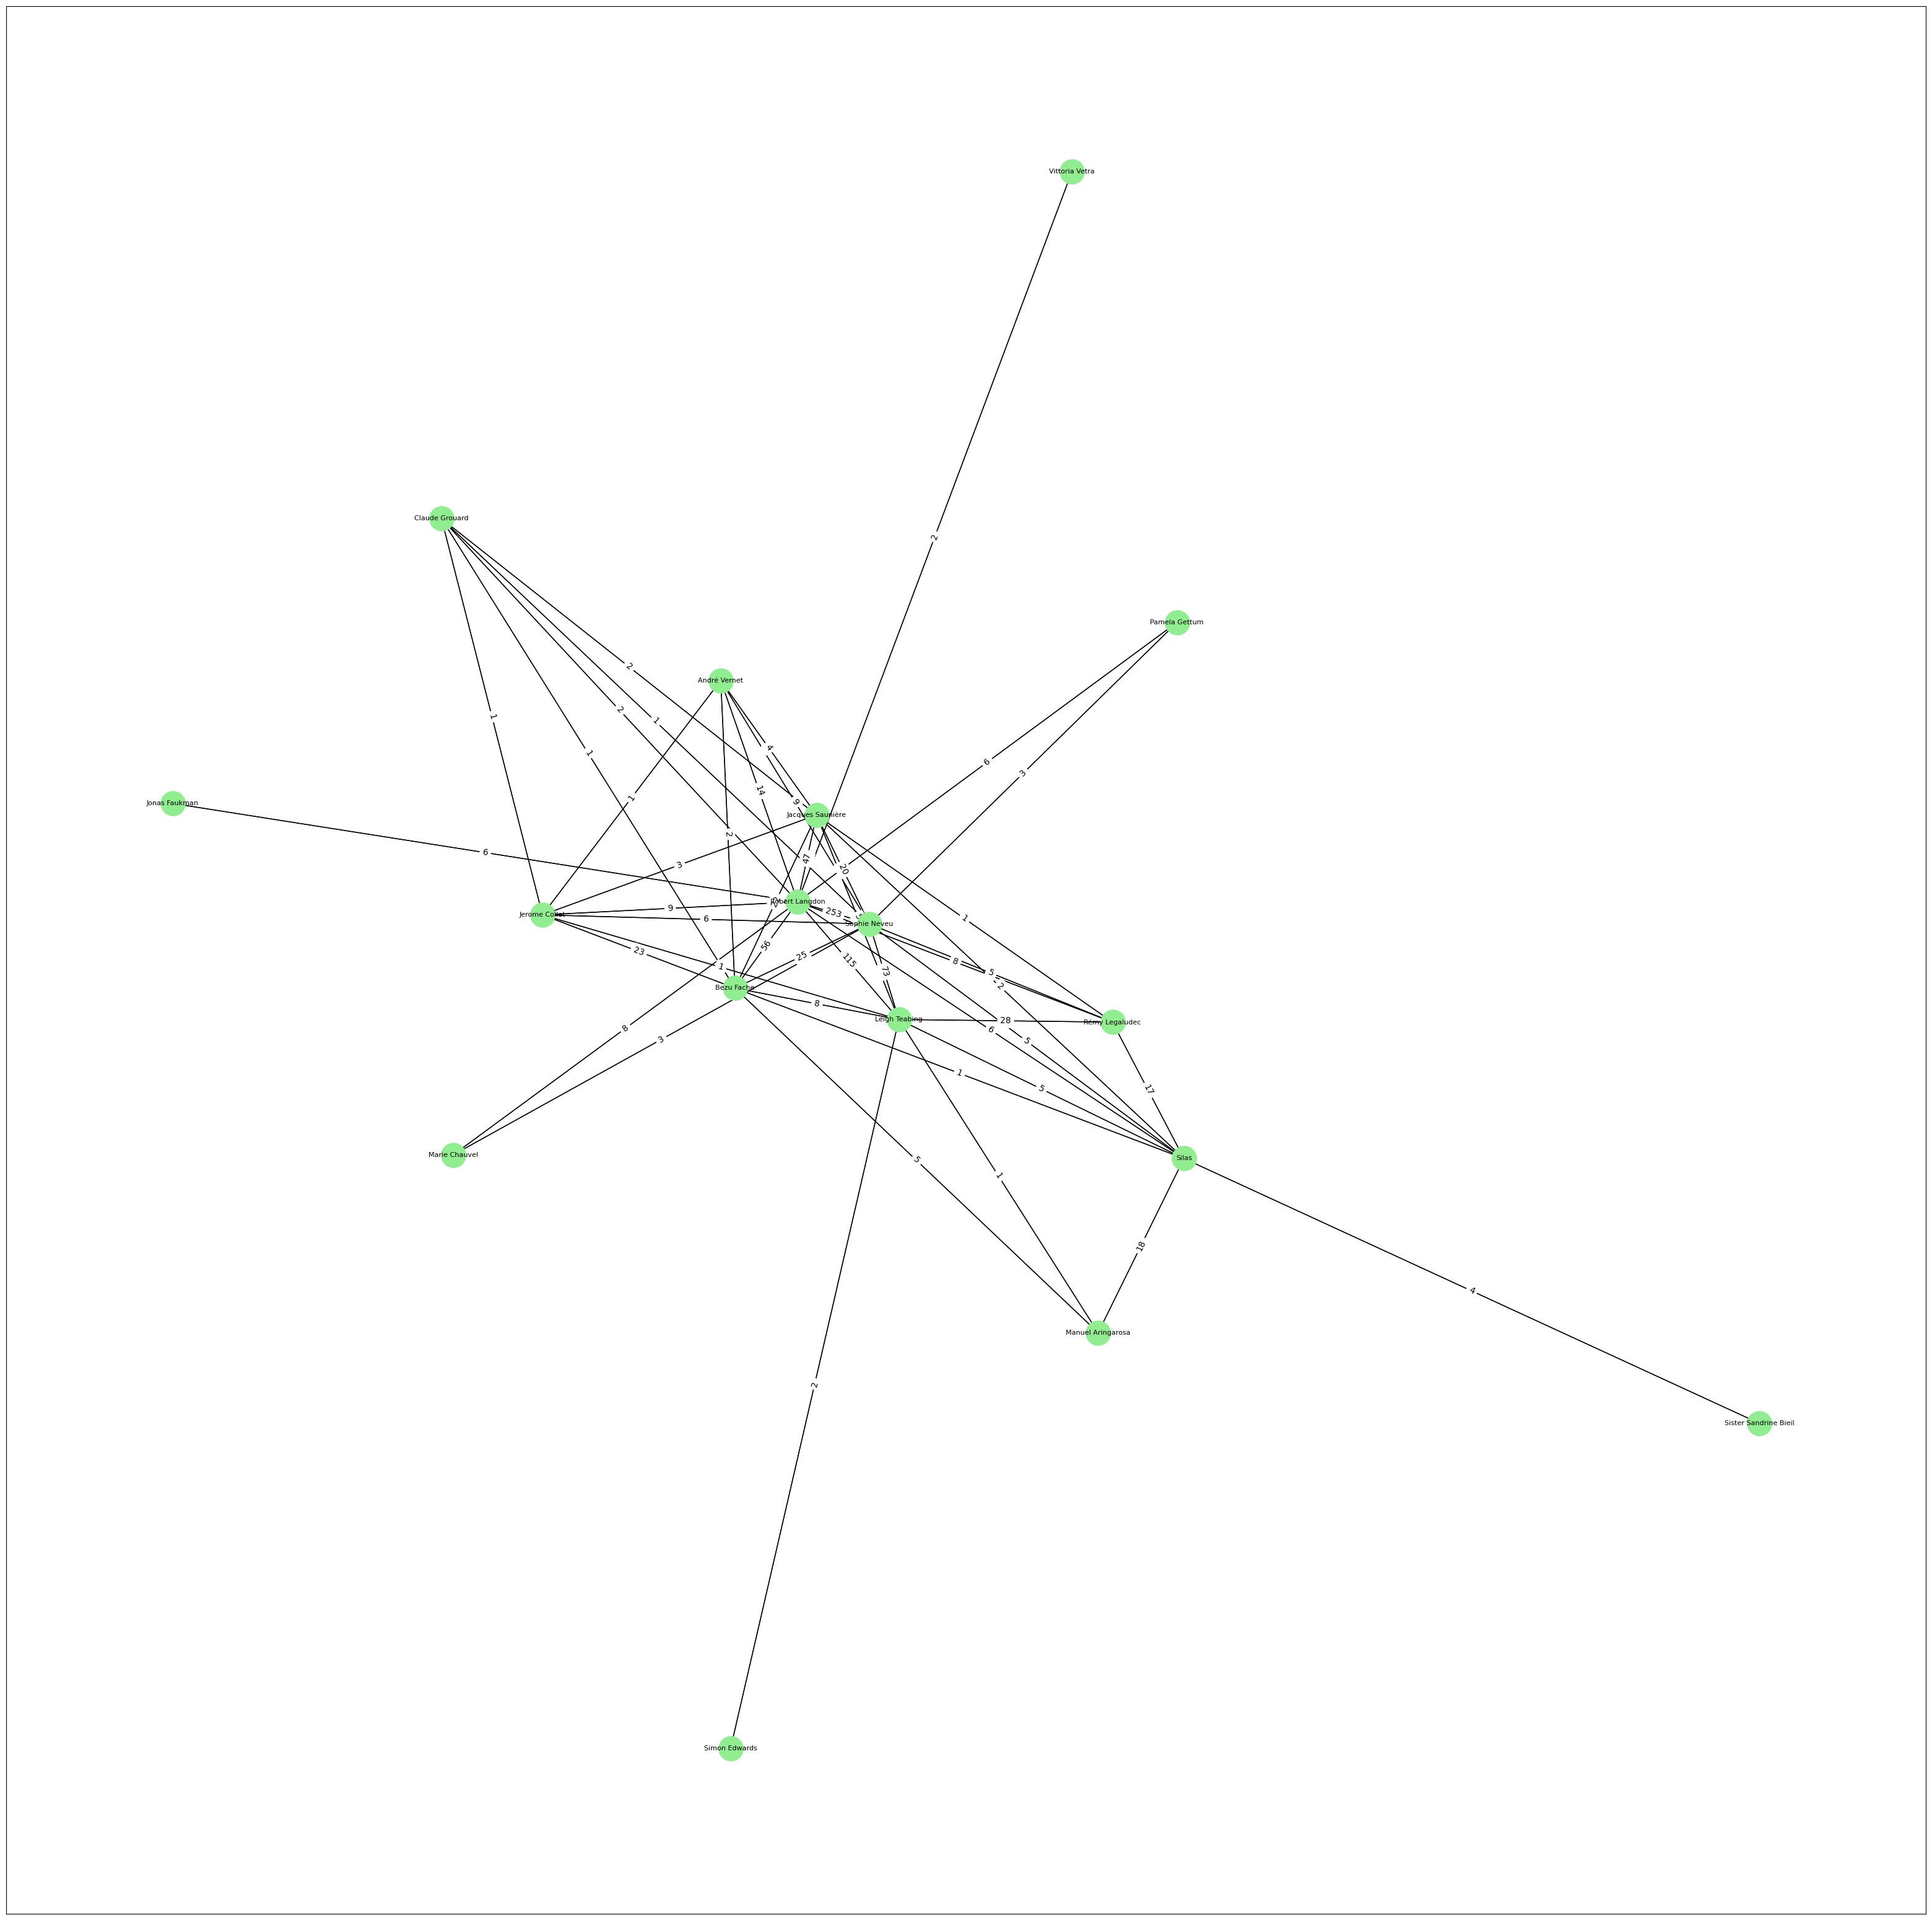

In [11]:
plt.figure(3, figsize=(40,40))
pos = nx.fruchterman_reingold_layout(G)

nx.draw_networkx(G, pos=pos, node_size = 800, font_size=8, node_color="lightgreen")
nx.draw_networkx_edges(G, pos=pos)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=edge_labels)
plt.show()

In [12]:
from operator import itemgetter

In [13]:
degc = nx.degree_centrality(G)
# let's list the scores
dclist = sorted(degc.items(), key=itemgetter(1), reverse=True)
dclist

[('Robert Langdon', 0.8125),
 ('Sophie Neveu', 0.6875),
 ('Leigh Teabing', 0.5625),
 ('Jacques Saunière', 0.5625),
 ('Bezu Fache', 0.5625),
 ('Silas', 0.5),
 ('Jerome Collet', 0.4375),
 ('André Vernet', 0.3125),
 ('Rémy Legaludec', 0.3125),
 ('Claude Grouard', 0.3125),
 ('Manuel Aringarosa', 0.1875),
 ('Pamela Gettum', 0.125),
 ('Marie Chauvel', 0.125),
 ('Vittoria Vetra', 0.0625),
 ('Jonas Faukman', 0.0625),
 ('Simon Edwards', 0.0625),
 ('Sister Sandrine Bieil', 0.0625)]

In [14]:
bet = nx.betweenness_centrality(G)
# let's list the scores
bclist = sorted(bet.items(), key=itemgetter(1), reverse=True)
bclist

[('Robert Langdon', 0.3668055555555556),
 ('Leigh Teabing', 0.15986111111111115),
 ('Silas', 0.1502777777777778),
 ('Sophie Neveu', 0.12513888888888888),
 ('Bezu Fache', 0.06027777777777777),
 ('Jacques Saunière', 0.029305555555555557),
 ('Jerome Collet', 0.008333333333333333),
 ('Vittoria Vetra', 0.0),
 ('André Vernet', 0.0),
 ('Rémy Legaludec', 0.0),
 ('Claude Grouard', 0.0),
 ('Pamela Gettum', 0.0),
 ('Jonas Faukman', 0.0),
 ('Simon Edwards', 0.0),
 ('Marie Chauvel', 0.0),
 ('Sister Sandrine Bieil', 0.0),
 ('Manuel Aringarosa', 0.0)]

In [15]:
clos = nx.closeness_centrality(G)
# let's list the scores
cclist = sorted(clos.items(), key=itemgetter(1), reverse=True)
cclist

[('Robert Langdon', 0.8421052631578947),
 ('Sophie Neveu', 0.7619047619047619),
 ('Leigh Teabing', 0.6956521739130435),
 ('Jacques Saunière', 0.6956521739130435),
 ('Bezu Fache', 0.6956521739130435),
 ('Silas', 0.6666666666666666),
 ('Jerome Collet', 0.6153846153846154),
 ('Rémy Legaludec', 0.5925925925925926),
 ('André Vernet', 0.5517241379310345),
 ('Claude Grouard', 0.5517241379310345),
 ('Pamela Gettum', 0.48484848484848486),
 ('Marie Chauvel', 0.48484848484848486),
 ('Manuel Aringarosa', 0.48484848484848486),
 ('Vittoria Vetra', 0.47058823529411764),
 ('Jonas Faukman', 0.47058823529411764),
 ('Simon Edwards', 0.42105263157894735),
 ('Sister Sandrine Bieil', 0.41025641025641024)]

In [16]:
from operator import itemgetter
s='\n sorted pagerank:\n'
print (s)
pgr=nx.pagerank(G)
print(sorted(pgr.items(), key=itemgetter(1), reverse=True))



 sorted pagerank:

[('Robert Langdon', 0.2773419169522005), ('Sophie Neveu', 0.2000073245646803), ('Leigh Teabing', 0.12714128862317373), ('Bezu Fache', 0.08002914436617228), ('Jacques Saunière', 0.060236730861040734), ('Silas', 0.05411174004114063), ('Rémy Legaludec', 0.04115527032724125), ('Jerome Collet', 0.030294864888309347), ('Manuel Aringarosa', 0.025929508049147676), ('André Vernet', 0.02229264869602489), ('Marie Chauvel', 0.013634044763624054), ('Pamela Gettum', 0.012747807367886343), ('Claude Grouard', 0.012158623839515761), ('Sister Sandrine Bieil', 0.011995405271682549), ('Jonas Faukman', 0.011482241598977849), ('Simon Edwards', 0.009731672981679717), ('Vittoria Vetra', 0.00970976680750242)]


In [17]:
print(nx.transitivity(G))

0.6


In [18]:
local_clustering = (nx.clustering(G))
local_clustering

{'Vittoria Vetra': 0,
 'André Vernet': 1.0,
 'Leigh Teabing': 0.5555555555555556,
 'Silas': 0.5714285714285714,
 'Jacques Saunière': 0.7222222222222222,
 'Sophie Neveu': 0.509090909090909,
 'Rémy Legaludec': 1.0,
 'Robert Langdon': 0.358974358974359,
 'Claude Grouard': 1.0,
 'Pamela Gettum': 1.0,
 'Jonas Faukman': 0,
 'Bezu Fache': 0.6666666666666666,
 'Simon Edwards': 0,
 'Jerome Collet': 0.8571428571428571,
 'Marie Chauvel': 1.0,
 'Sister Sandrine Bieil': 0,
 'Manuel Aringarosa': 1.0}

In [19]:
print(nx.average_clustering(G))

0.6024165377106554


In [20]:
!pip install community

In [21]:
import community.community_louvain as community_louvain

In [22]:
nx.draw_networkx(G,with_labels=True, node_size=100,node_color='cyan')

In [23]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['André Vernet',
  'Bezu Fache',
  'Claude Grouard',
  'Jacques Saunière',
  'Jerome Collet',
  'Jonas Faukman',
  'Leigh Teabing',
  'Manuel Aringarosa',
  'Marie Chauvel',
  'Pamela Gettum',
  'Robert Langdon',
  'Rémy Legaludec',
  'Silas',
  'Sister Sandrine Bieil',
  'Sophie Neveu'],
 ['Simon Edwards'],
 ['Vittoria Vetra']]

In [24]:
!pip install python-louvain

In [25]:
#first compute the best partition
import community
part = community.community_louvain.best_partition(G)
print(part)

{'Vittoria Vetra': 2, 'André Vernet': 1, 'Leigh Teabing': 2, 'Silas': 0, 'Jacques Saunière': 1, 'Sophie Neveu': 2, 'Rémy Legaludec': 0, 'Robert Langdon': 2, 'Claude Grouard': 1, 'Pamela Gettum': 2, 'Jonas Faukman': 2, 'Bezu Fache': 1, 'Simon Edwards': 2, 'Jerome Collet': 1, 'Marie Chauvel': 2, 'Sister Sandrine Bieil': 0, 'Manuel Aringarosa': 0}


In [26]:
print(community_louvain.modularity(part, G))

0.11806367475895721


In [27]:
induced = community_louvain.induced_graph(part, G)
print(induced.nodes())
print(induced.edges())

[2, 1, 0]
[(2, 2), (2, 1), (2, 0), (1, 1), (1, 0), (0, 0)]


In [28]:
nx.draw_networkx(induced,node_color='cyan')

In [29]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 4))
print(c)

[frozenset({'Silas', 'André Vernet', 'Sophie Neveu', 'Jerome Collet', 'Manuel Aringarosa', 'Claude Grouard', 'Leigh Teabing', 'Robert Langdon', 'Jacques Saunière', 'Rémy Legaludec', 'Bezu Fache'})]


In [30]:
print(len(list(c)))


1


In [31]:
list(c)

[frozenset({'André Vernet',
            'Bezu Fache',
            'Claude Grouard',
            'Jacques Saunière',
            'Jerome Collet',
            'Leigh Teabing',
            'Manuel Aringarosa',
            'Robert Langdon',
            'Rémy Legaludec',
            'Silas',
            'Sophie Neveu'})]

### Shortest Path

In [32]:
source = 'Leigh Teabing'
target = 'André Vernet'
nx.shortest_path(G, source, target)

['Leigh Teabing', 'Jacques Saunière', 'André Vernet']

In [33]:
# Shortest paths are not unique
list(nx.all_shortest_paths(G, source, target))

[['Leigh Teabing', 'Jacques Saunière', 'André Vernet'],
 ['Leigh Teabing', 'Sophie Neveu', 'André Vernet'],
 ['Leigh Teabing', 'Robert Langdon', 'André Vernet'],
 ['Leigh Teabing', 'Bezu Fache', 'André Vernet'],
 ['Leigh Teabing', 'Jerome Collet', 'André Vernet']]

In [34]:
#Highlithing shortest paths available from source to target
def plot_paths(G, paths):
    plt.figure(figsize=(25,25))
    pos = nx.fruchterman_reingold_layout(G)
    nx.draw_networkx_nodes(G, pos=pos, node_size=3000, node_color='yellow')
    nx.draw_networkx_labels(G, pos=pos, labels={n: n for n in G})
    # Draw edges
    nx.draw_networkx_edges(G, pos=pos)
    for path in paths:
        edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos=pos, edgelist=edges, edge_color='red', width=3)
    ax = plt.gca()
    ax.set_axis_off()
    ax.grid(None)

In [35]:
plot_paths(G, [nx.shortest_path(G, source, target)])

In [36]:
plot_paths(G, nx.all_shortest_paths(G, source, target))

### Fidning the Size of the Component

In [37]:
a = nx.is_connected(G)
s='\n Is a connected graph: ' +repr(a)
print (s)

no=len(list(nx.connected_components(G)))
s='\n no of connected components: ' +repr(no)
print (s)

#Gecum13ate a sorted list of connected components, largest first 
CoC=sorted(nx.connected_components(G), key = len, reverse=True)
for item in CoC:
    cclen=len(item)
    s= "\n Connected component length:" +repr(cclen)
    print (s)
    print ("\n Connected component :")
    print (item)



 Is a connected graph: True

 no of connected components: 1

 Connected component length:17

 Connected component :
{'Vittoria Vetra', 'Silas', 'Simon Edwards', 'Sister Sandrine Bieil', 'André Vernet', 'Sophie Neveu', 'Jerome Collet', 'Jonas Faukman', 'Manuel Aringarosa', 'Pamela Gettum', 'Claude Grouard', 'Marie Chauvel', 'Robert Langdon', 'Leigh Teabing', 'Jacques Saunière', 'Rémy Legaludec', 'Bezu Fache'}


In [38]:
list(nx.connected_components(G))

[{'André Vernet',
  'Bezu Fache',
  'Claude Grouard',
  'Jacques Saunière',
  'Jerome Collet',
  'Jonas Faukman',
  'Leigh Teabing',
  'Manuel Aringarosa',
  'Marie Chauvel',
  'Pamela Gettum',
  'Robert Langdon',
  'Rémy Legaludec',
  'Silas',
  'Simon Edwards',
  'Sister Sandrine Bieil',
  'Sophie Neveu',
  'Vittoria Vetra'}]

### Clique Percolation method : find community using 3 clique

In [39]:
from networkx.algorithms.community import k_clique_communities  # find k-clique community using percolation method
c = list(k_clique_communities(G, 3))
print(c)

[frozenset({'André Vernet', 'Sophie Neveu', 'Jerome Collet', 'Claude Grouard', 'Marie Chauvel', 'Leigh Teabing', 'Rémy Legaludec', 'Bezu Fache', 'Silas', 'Manuel Aringarosa', 'Pamela Gettum', 'Robert Langdon', 'Jacques Saunière'})]


In [40]:
print(list(c[0]))


['André Vernet', 'Sophie Neveu', 'Jerome Collet', 'Claude Grouard', 'Marie Chauvel', 'Leigh Teabing', 'Rémy Legaludec', 'Bezu Fache', 'Silas', 'Manuel Aringarosa', 'Pamela Gettum', 'Robert Langdon', 'Jacques Saunière']


In [41]:
from networkx.algorithms.community.centrality import girvan_newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['André Vernet',
  'Bezu Fache',
  'Claude Grouard',
  'Jacques Saunière',
  'Jerome Collet',
  'Jonas Faukman',
  'Leigh Teabing',
  'Manuel Aringarosa',
  'Marie Chauvel',
  'Pamela Gettum',
  'Robert Langdon',
  'Rémy Legaludec',
  'Silas',
  'Sister Sandrine Bieil',
  'Sophie Neveu'],
 ['Simon Edwards'],
 ['Vittoria Vetra']]

In [42]:
N,K = G.order(), G.size()
avg_deg = float(K)/N
print ("Nodes: ", N)
print ("Edges: ", K)
print ("Average degree: ", avg_deg)


Nodes:  17
Edges:  46
Average degree:  2.7058823529411766


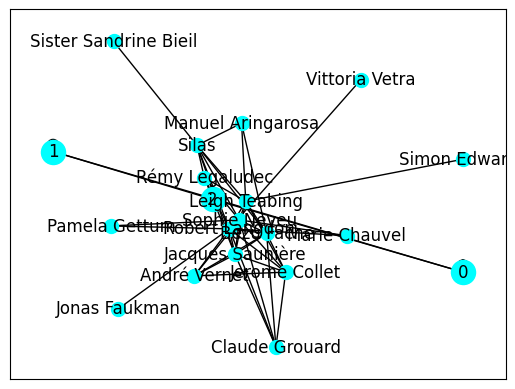

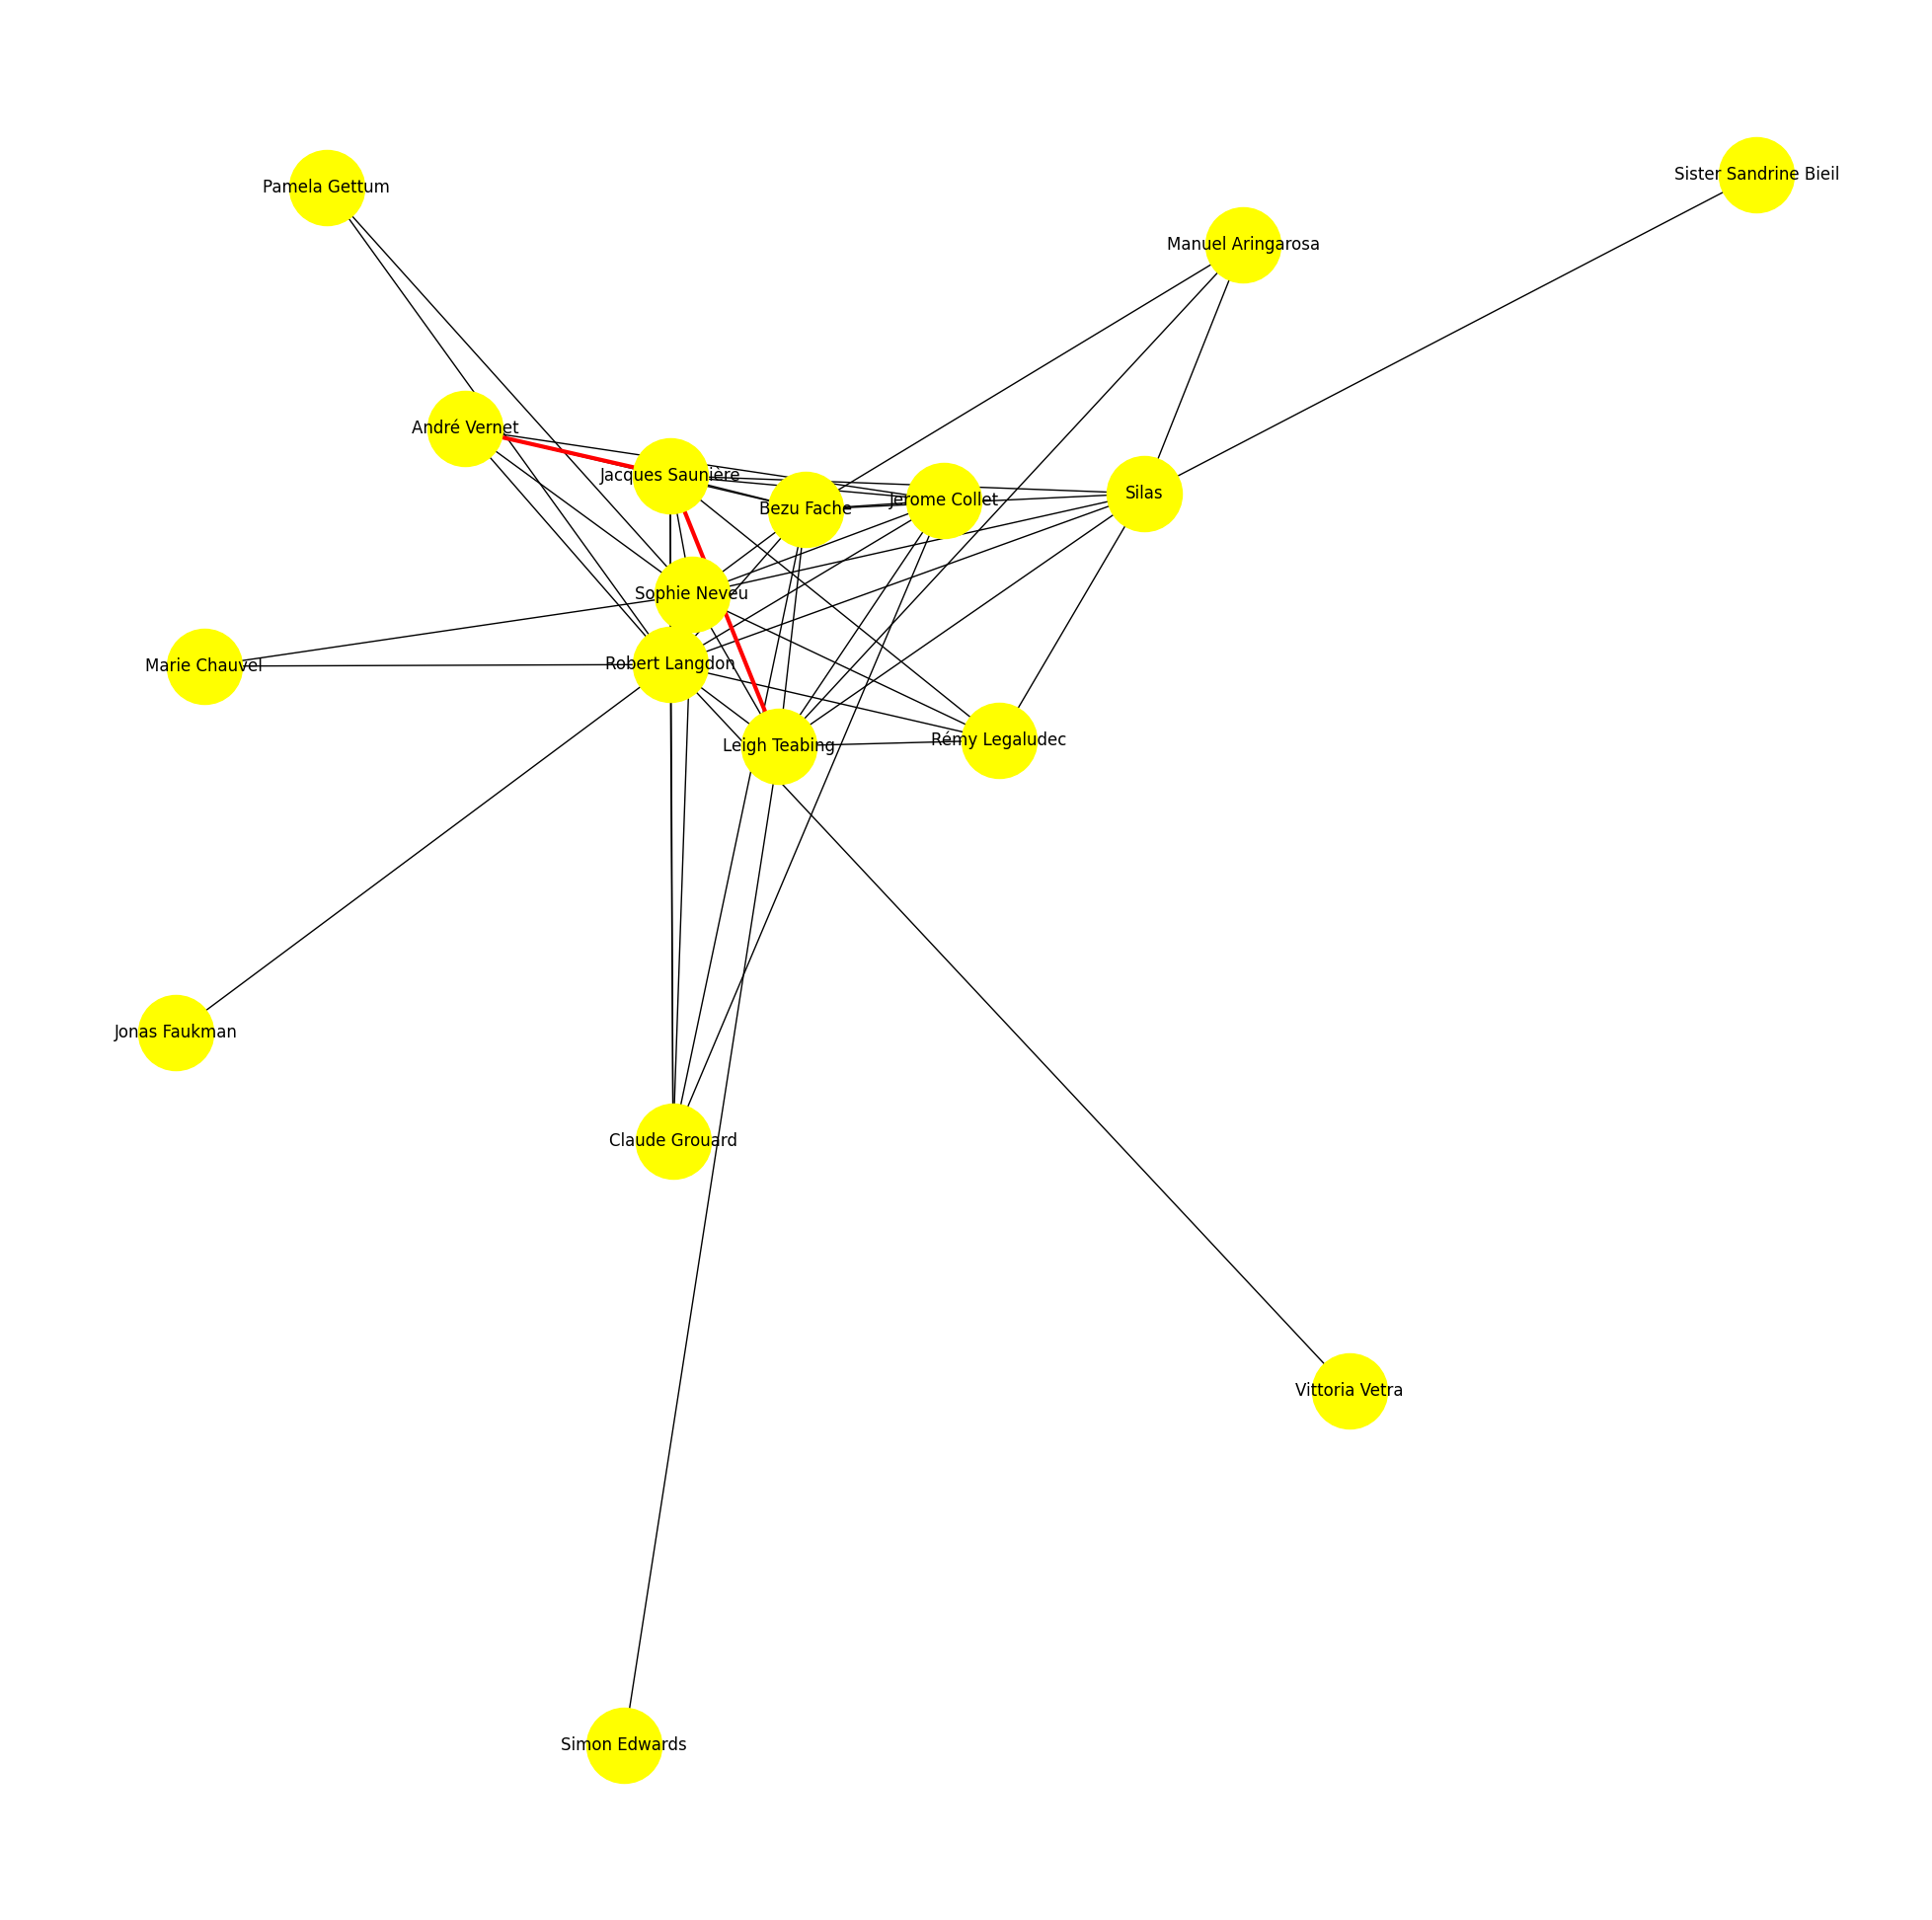

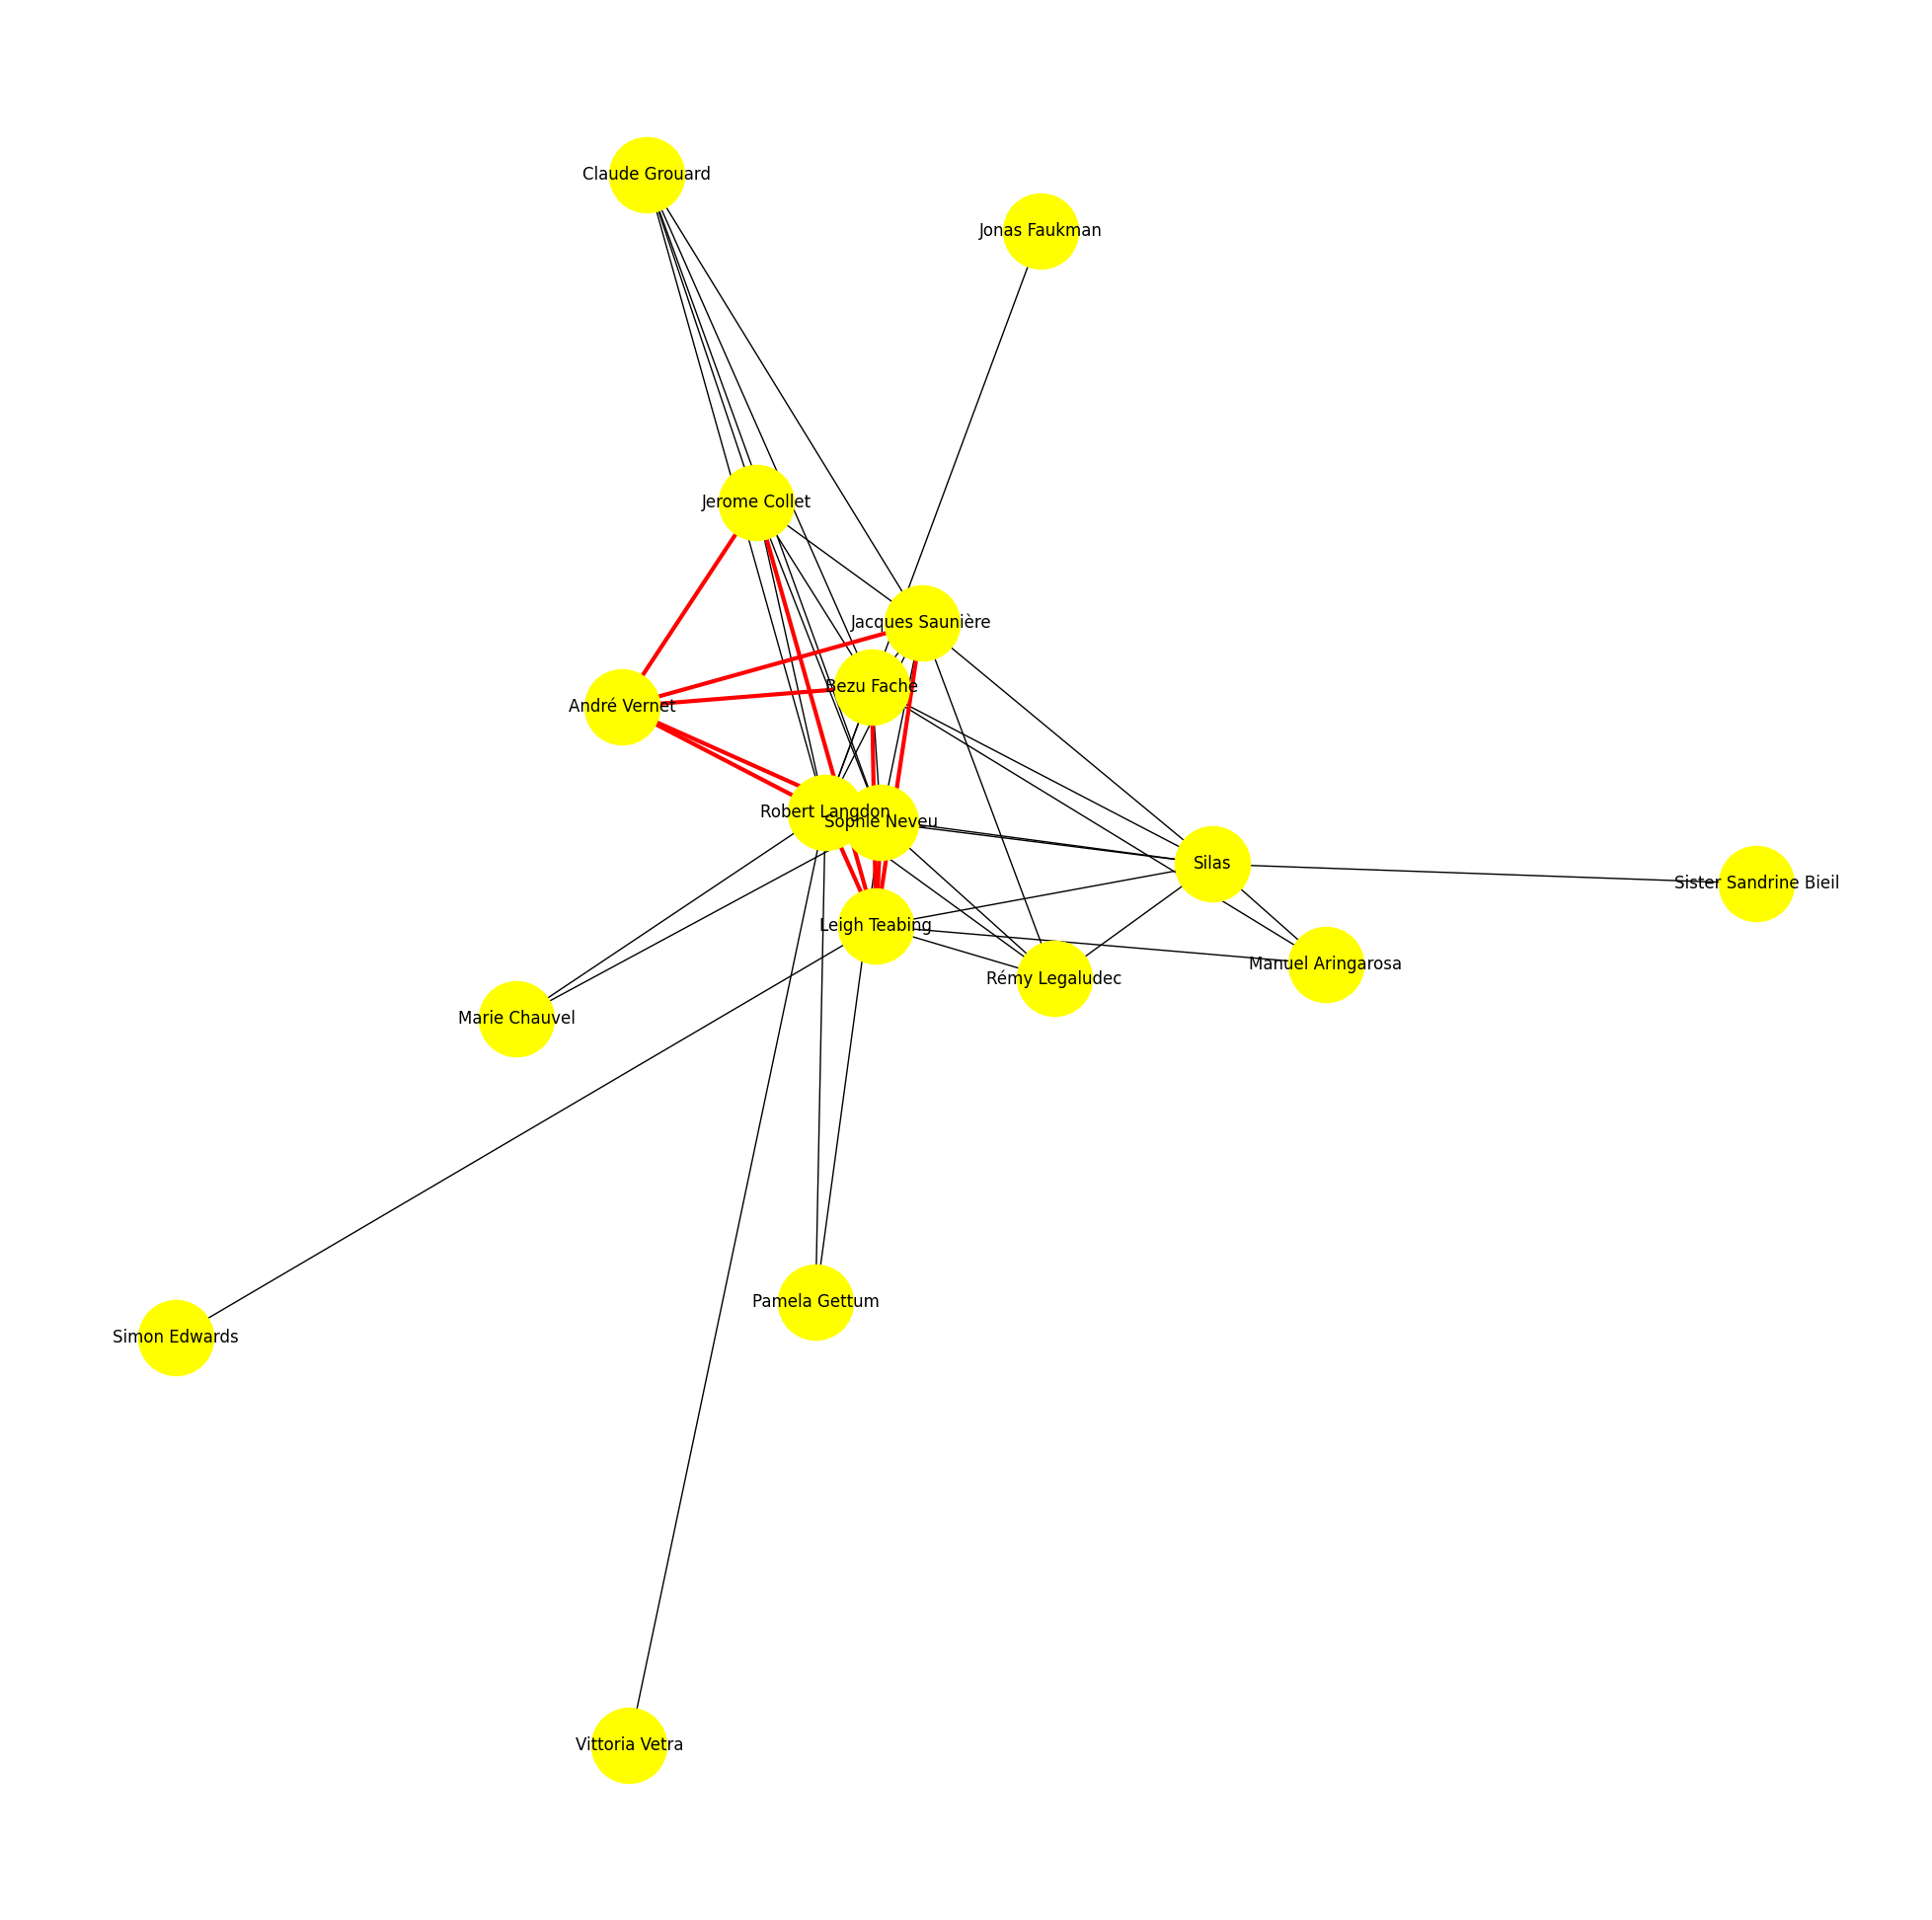

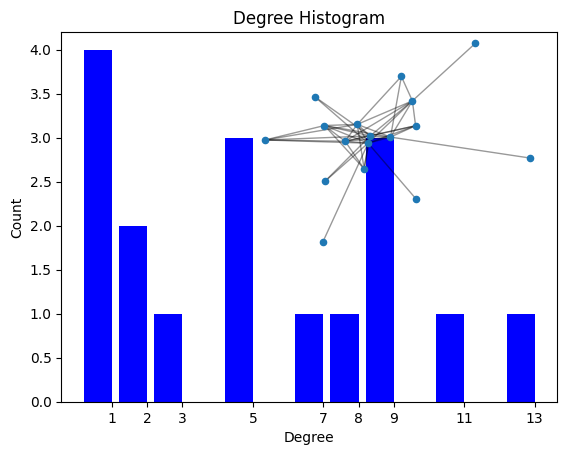

In [43]:
import collections

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

# draw graph in inset
plt.axes([0.4, 0.4, 0.5, 0.5])
A = (G.subgraph(c) for c in nx.connected_components(G))
Gcc = sorted(A, key=len, reverse=True)[0]
pos = nx.spring_layout(G)
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_size=20)
nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

### Generative Models

In [44]:
nodes=G.number_of_nodes()
nodes

17

In [45]:
#calculate average degree to use with random graph models 

degree_list = list(nx.degree(G))
#print(degree_list)
no_nodes=len(degree_list)
total_degree=0
for node in degree_list[:5]:
    print("Node ", node[0], " : Degree is ", node[1])
    total_degree=total_degree+ node[1]
avg_degree= total_degree/no_nodes
avg_degree

Node  Vittoria Vetra  : Degree is  1
Node  André Vernet  : Degree is  5
Node  Leigh Teabing  : Degree is  9
Node  Silas  : Degree is  8
Node  Jacques Saunière  : Degree is  9


1.8823529411764706

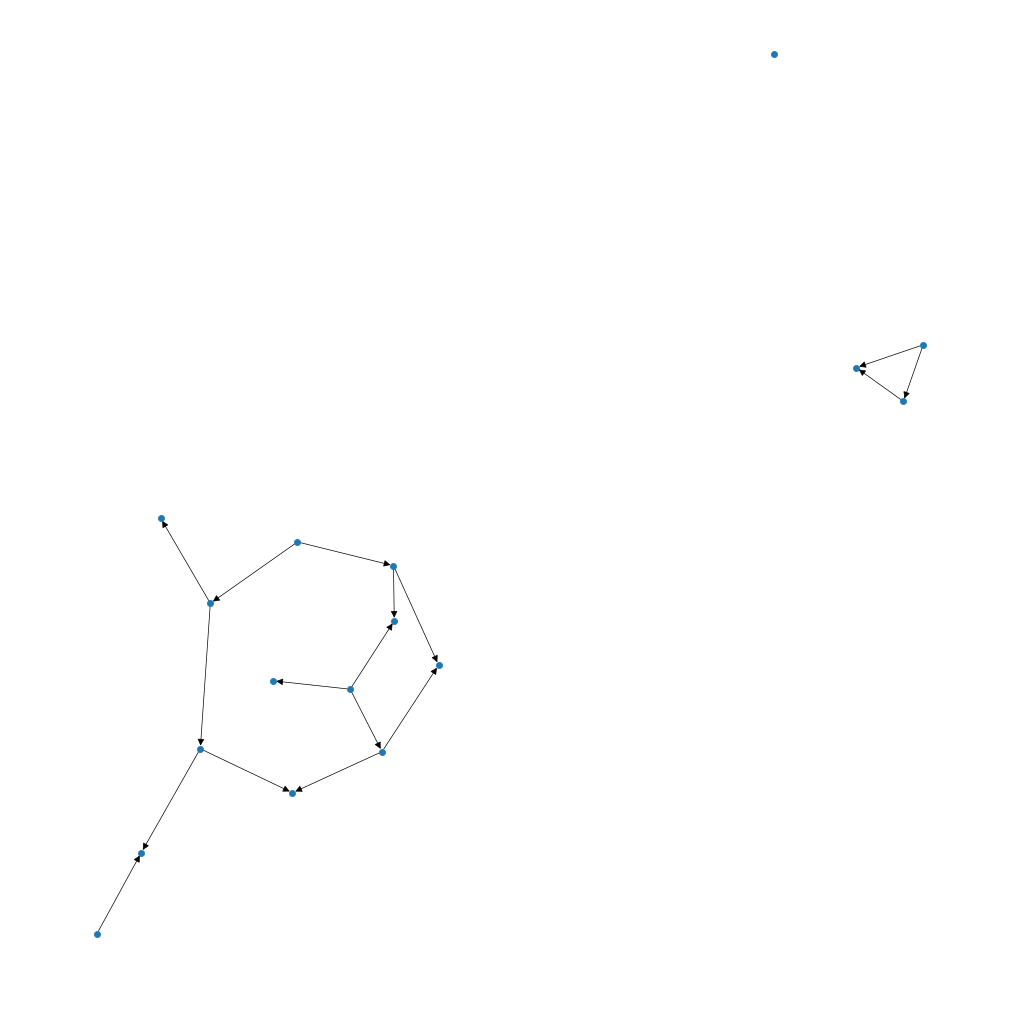

In [46]:
p=avg_degree/(no_nodes-1)
G2 = nx.erdos_renyi_graph(no_nodes,p)  # same call 
#G2 = nx.gnp_random_graph(no_nodes,p)
fig = plt.figure(figsize =(10 ,10))
nx.draw(G2, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()


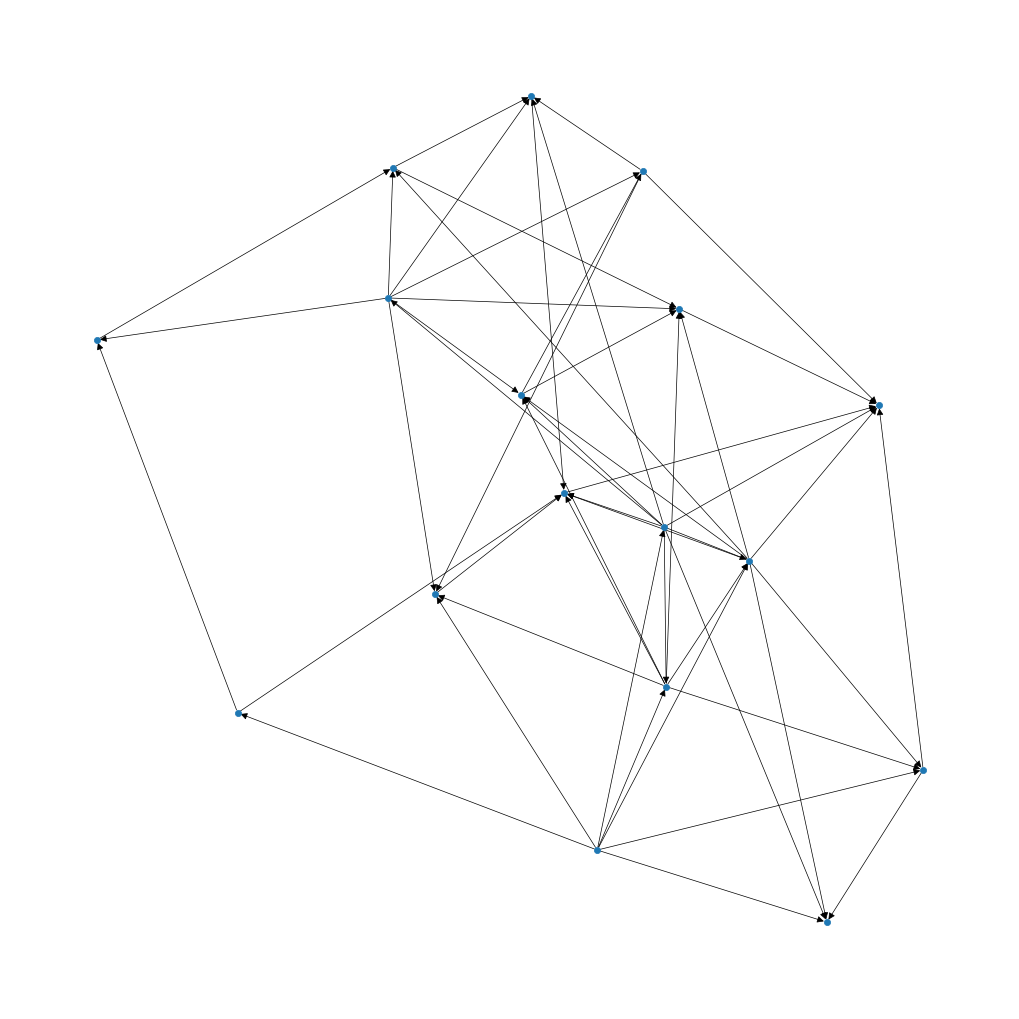

In [60]:
#Make random graph 
G3 = nx.gnp_random_graph(no_nodes,0.34)
#assuming probability for node creation 0.1 
fig = plt.figure(figsize =(10 ,10))
nx.draw(G3, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5, arrows=True)
plt.show()

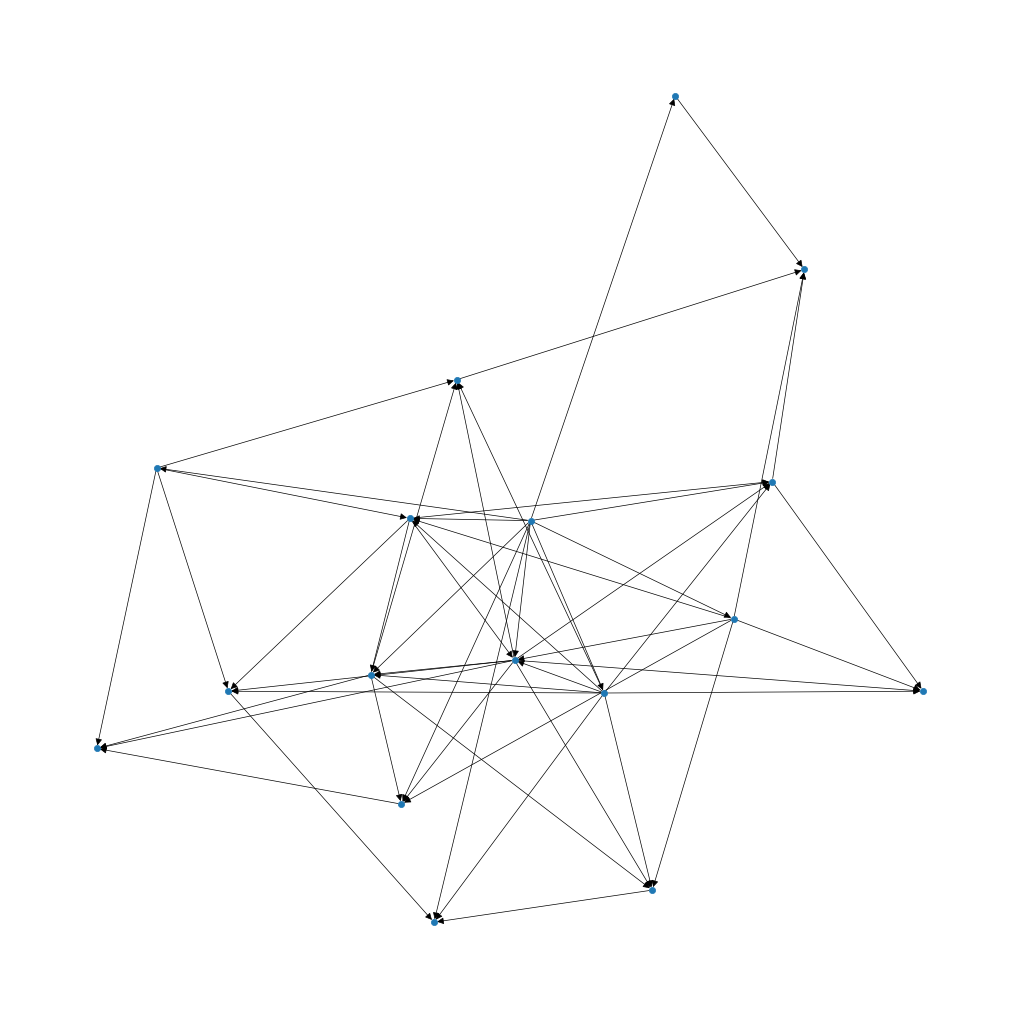

In [59]:
neighbours=4
H = nx.barabasi_albert_graph(no_nodes,neighbours)
fig = plt.figure(figsize =(10 ,10))
nx.draw(H, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

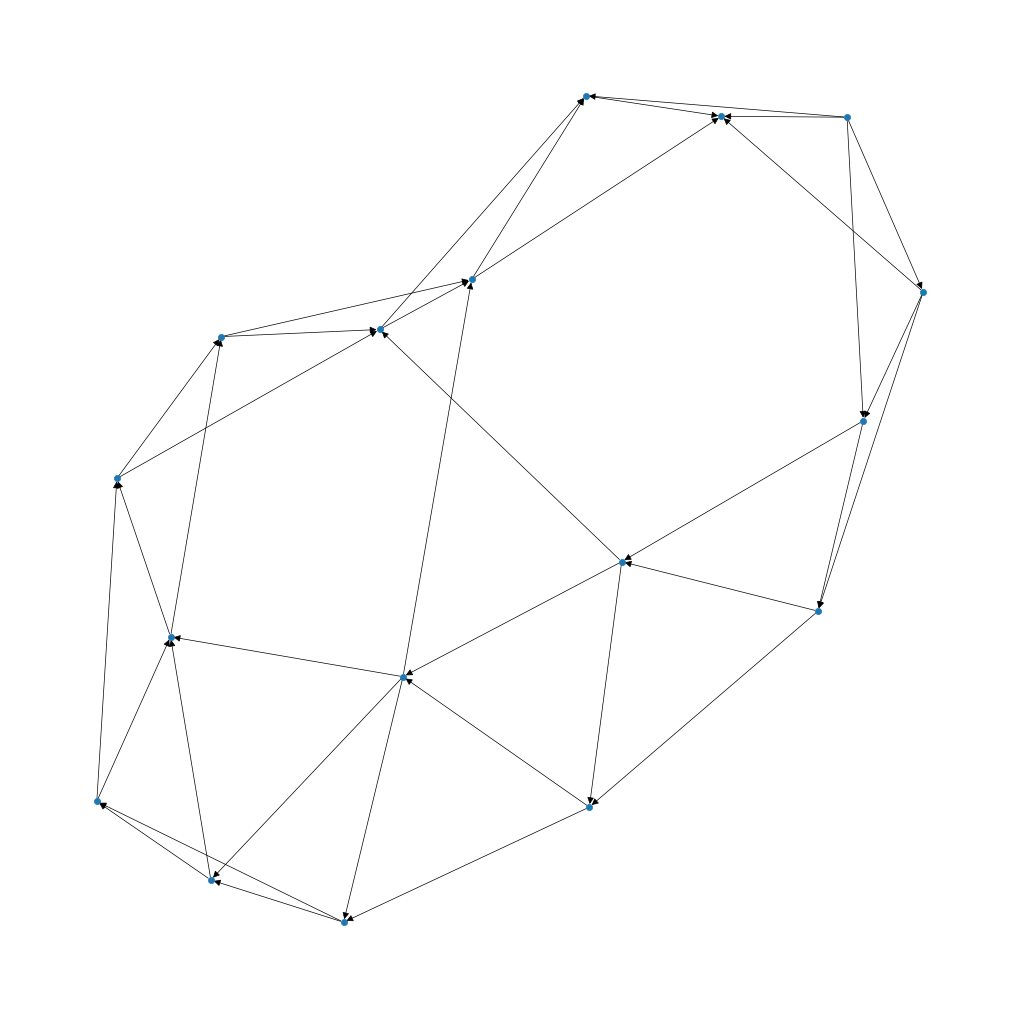

In [66]:
W = nx.newman_watts_strogatz_graph(no_nodes,neighbours,p)
fig = plt.figure(figsize =(10 ,10))

nx.draw(W, with_labels = False, node_size = 20, linewidths = 0.5, width = 0.5,arrows=True)
plt.show()

### Degree, Closeness and Betweeness centrality for Erdos Renyi graph

In [61]:
degc = nx.degree_centrality(G2)
# let's list the scores
dclist = sorted(degc.items(), key=itemgetter(1), reverse=True)
dclist

[(14, 0.5625),
 (5, 0.5),
 (11, 0.5),
 (2, 0.4375),
 (8, 0.4375),
 (13, 0.4375),
 (1, 0.375),
 (3, 0.375),
 (9, 0.375),
 (15, 0.375),
 (0, 0.3125),
 (6, 0.3125),
 (4, 0.25),
 (10, 0.25),
 (7, 0.1875),
 (16, 0.125),
 (12, 0.0625)]

In [68]:
clos = nx.closeness_centrality(G2)
# let's list the scores
cclist = sorted(clos.items(), key=itemgetter(1), reverse=True)
cclist

[(5, 0.64),
 (14, 0.6153846153846154),
 (1, 0.5925925925925926),
 (2, 0.5925925925925926),
 (11, 0.5925925925925926),
 (8, 0.5714285714285714),
 (9, 0.5714285714285714),
 (13, 0.5714285714285714),
 (15, 0.5714285714285714),
 (0, 0.5333333333333333),
 (3, 0.5333333333333333),
 (6, 0.5333333333333333),
 (10, 0.5161290322580645),
 (4, 0.5),
 (7, 0.42105263157894735),
 (16, 0.4),
 (12, 0.2909090909090909)]

In [72]:
bet = nx.betweenness_centrality(G2)
# let's list the scores
bclist = sorted(bet.items(), key=itemgetter(1), reverse=True)
bclist

[(1, 0.25358974358974357),
 (5, 0.12655982905982904),
 (16, 0.125),
 (14, 0.07572649572649573),
 (8, 0.07197649572649573),
 (13, 0.07050213675213675),
 (11, 0.06959401709401708),
 (2, 0.06367521367521367),
 (15, 0.05905982905982906),
 (6, 0.0409508547008547),
 (9, 0.03919871794871795),
 (0, 0.025277777777777774),
 (10, 0.023055555555555555),
 (3, 0.016666666666666666),
 (4, 0.010416666666666666),
 (7, 0.0037499999999999994),
 (12, 0.0)]

### Degree, Closeness and Betweeness centrality for Random graph

In [62]:
degc = nx.degree_centrality(G3)
# let's list the scores
dclist = sorted(degc.items(), key=itemgetter(1), reverse=True)
dclist

[(3, 0.625),
 (1, 0.5625),
 (2, 0.5),
 (4, 0.5),
 (0, 0.4375),
 (13, 0.4375),
 (7, 0.375),
 (15, 0.375),
 (16, 0.375),
 (8, 0.3125),
 (9, 0.3125),
 (10, 0.3125),
 (11, 0.3125),
 (12, 0.3125),
 (14, 0.25),
 (5, 0.1875),
 (6, 0.1875)]

In [69]:
clos = nx.closeness_centrality(G3)
# let's list the scores
cclist = sorted(clos.items(), key=itemgetter(1), reverse=True)
cclist

[(3, 0.7272727272727273),
 (1, 0.6956521739130435),
 (0, 0.64),
 (2, 0.64),
 (4, 0.64),
 (13, 0.64),
 (7, 0.5925925925925926),
 (9, 0.5925925925925926),
 (10, 0.5925925925925926),
 (15, 0.5925925925925926),
 (16, 0.5925925925925926),
 (11, 0.5714285714285714),
 (8, 0.5517241379310345),
 (12, 0.5333333333333333),
 (14, 0.5333333333333333),
 (5, 0.5),
 (6, 0.48484848484848486)]

In [73]:
bet = nx.betweenness_centrality(G3)
# let's list the scores
bclist = sorted(bet.items(), key=itemgetter(1), reverse=True)
bclist

[(3, 0.1194345238095238),
 (4, 0.10120039682539682),
 (1, 0.09723214285714285),
 (13, 0.07360119047619047),
 (0, 0.07311507936507937),
 (2, 0.05200396825396825),
 (16, 0.0420734126984127),
 (10, 0.04011904761904762),
 (9, 0.03257936507936508),
 (5, 0.02875),
 (15, 0.028452380952380948),
 (7, 0.02334325396825397),
 (8, 0.022956349206349203),
 (6, 0.021904761904761906),
 (11, 0.021458333333333326),
 (12, 0.010347222222222223),
 (14, 0.0030952380952380953)]

### Degree, Closeness and Betweeness centrality for Barabasi Albert graph

In [63]:
degc = nx.degree_centrality(H)
# let's list the scores
dclist = sorted(degc.items(), key=itemgetter(1), reverse=True)
dclist

[(6, 0.75),
 (0, 0.625),
 (1, 0.625),
 (5, 0.5),
 (7, 0.5),
 (2, 0.4375),
 (13, 0.375),
 (4, 0.3125),
 (8, 0.3125),
 (9, 0.3125),
 (10, 0.3125),
 (12, 0.3125),
 (11, 0.25),
 (14, 0.25),
 (15, 0.25),
 (16, 0.25),
 (3, 0.125)]

In [70]:
clos = nx.closeness_centrality(H)
# let's list the scores
cclist = sorted(clos.items(), key=itemgetter(1), reverse=True)
cclist

[(6, 0.8),
 (0, 0.7272727272727273),
 (1, 0.7272727272727273),
 (5, 0.6666666666666666),
 (7, 0.6666666666666666),
 (2, 0.64),
 (13, 0.6153846153846154),
 (9, 0.5925925925925926),
 (12, 0.5925925925925926),
 (4, 0.5517241379310345),
 (8, 0.5517241379310345),
 (10, 0.5517241379310345),
 (11, 0.5333333333333333),
 (16, 0.5333333333333333),
 (14, 0.5161290322580645),
 (15, 0.5161290322580645),
 (3, 0.47058823529411764)]

In [74]:
bet = nx.betweenness_centrality(H)
# let's list the scores
bclist = sorted(bet.items(), key=itemgetter(1), reverse=True)
bclist

[(0, 0.1712650829562594),
 (6, 0.15753110859728506),
 (1, 0.09591377576671693),
 (2, 0.06573466566113624),
 (7, 0.04779411764705881),
 (5, 0.040913775766716946),
 (12, 0.040877639517345396),
 (13, 0.03357371794871794),
 (15, 0.029444444444444443),
 (4, 0.02826388888888889),
 (10, 0.017197083961789844),
 (8, 0.015416666666666665),
 (9, 0.012222222222222221),
 (11, 0.010147058823529412),
 (14, 0.009538084464555055),
 (3, 0.004166666666666667),
 (16, 0.0033333333333333335)]

### Degree, Closeness and Betweeness centrality for Newman Watts Strogatz graph

In [67]:
degc = nx.degree_centrality(W)
# let's list the scores
dclist = sorted(degc.items(), key=itemgetter(1), reverse=True)
dclist

[(6, 0.375),
 (4, 0.3125),
 (10, 0.3125),
 (13, 0.3125),
 (14, 0.3125),
 (0, 0.25),
 (1, 0.25),
 (2, 0.25),
 (3, 0.25),
 (5, 0.25),
 (7, 0.25),
 (8, 0.25),
 (9, 0.25),
 (11, 0.25),
 (12, 0.25),
 (15, 0.25),
 (16, 0.25)]

In [71]:
clos = nx.closeness_centrality(W)
# let's list the scores
cclist = sorted(clos.items(), key=itemgetter(1), reverse=True)
cclist

[(6, 0.5714285714285714),
 (4, 0.5517241379310345),
 (13, 0.5333333333333333),
 (14, 0.5333333333333333),
 (5, 0.48484848484848486),
 (12, 0.47058823529411764),
 (15, 0.47058823529411764),
 (3, 0.45714285714285713),
 (10, 0.45714285714285713),
 (11, 0.45714285714285713),
 (2, 0.4444444444444444),
 (7, 0.4444444444444444),
 (16, 0.4444444444444444),
 (8, 0.43243243243243246),
 (0, 0.4),
 (1, 0.4),
 (9, 0.4)]

In [76]:
bet = nx.betweenness_centrality(W)
# let's list the scores
bclist = sorted(bet.items(), key=itemgetter(1), reverse=True)
bclist

[(6, 0.22339285714285717),
 (4, 0.1696626984126984),
 (14, 0.16357142857142856),
 (13, 0.15115079365079362),
 (5, 0.07680555555555556),
 (3, 0.06694444444444443),
 (15, 0.06373015873015872),
 (16, 0.05918650793650794),
 (10, 0.05404761904761905),
 (11, 0.0530952380952381),
 (7, 0.04924603174603174),
 (2, 0.046468253968253964),
 (12, 0.03706349206349206),
 (1, 0.035694444444444445),
 (0, 0.02861111111111111),
 (9, 0.02513888888888889),
 (8, 0.012857142857142857)]

### Ego centric graphs for protagonists

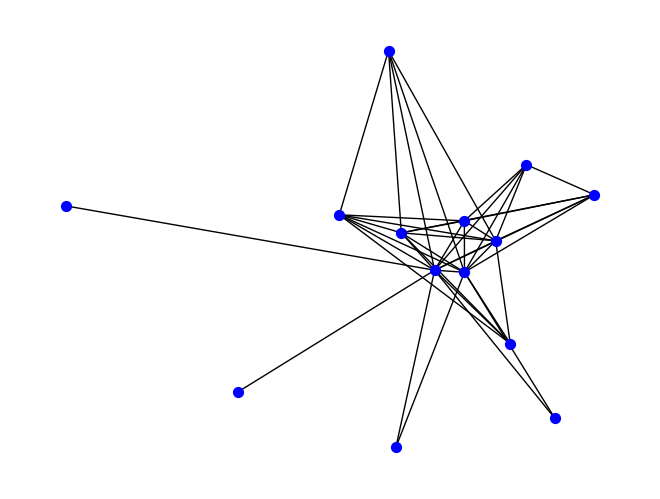

In [50]:
s='Robert Langdon'
#u = unicode(s, "utf-8")
hub_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hub_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('Langdon.png')
plt.show()
nx.write_gml(hub_ego,"Langdon.gml")



In [51]:
no_node=len(hub_ego.nodes())
no_edges=len(hub_ego.edges())
print("Langdon's Ego Network : nodes", no_node)
print("Langdon's Ego Network : edges", no_edges)

Langdon's Ego Network : nodes 14
Langdon's Ego Network : edges 41


In [85]:
local_clustering = (nx.clustering(hub_ego))
local_clustering

{'André Vernet': 1.0,
 'Leigh Teabing': 0.8571428571428571,
 'Silas': 0.9333333333333333,
 'Jacques Saunière': 0.7222222222222222,
 'Sophie Neveu': 0.509090909090909,
 'Rémy Legaludec': 1.0,
 'Robert Langdon': 0.509090909090909,
 'Claude Grouard': 1.0,
 'Pamela Gettum': 1.0,
 'Bezu Fache': 0.7857142857142857,
 'Jerome Collet': 0.8571428571428571,
 'Marie Chauvel': 1.0}

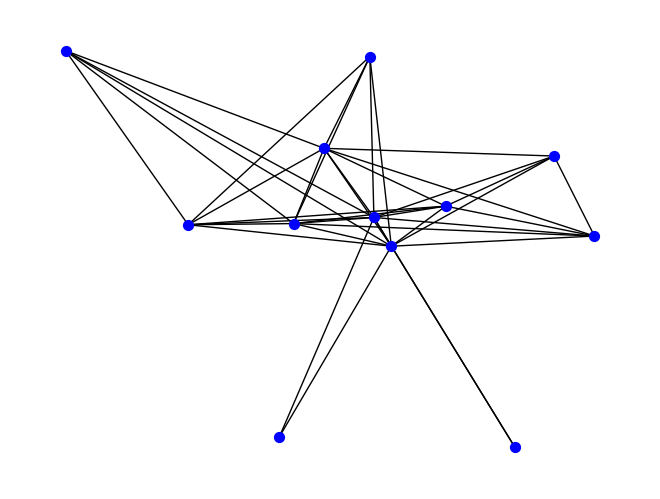

In [83]:
s='Sophie Neveu'
#u = unicode(s, "utf-8")
hu_ego=nx.ego_graph(G,s)
# Draw graph
pos=nx.spring_layout(hub_ego)
nx.draw(hu_ego,pos,node_color='b',node_size=50,with_labels=False)
# Draw ego as large and red
#nx.draw_networkx_nodes(hub_ego,pos,with_labels = True,nodelist=[largest_hub],node_size=300,node_color='r')
plt.savefig('Sophie.png')
plt.show()
nx.write_gml(hub_ego,"Sophie.gml")



In [81]:
no_node=len(hub_ego.nodes())
no_edges=len(hub_ego.edges())
print("Sophie's Ego Network : nodes", no_node)
print("Sophie's Ego Network : edges", no_edges)

Sophie's Ego Network : nodes 12
Sophie's Ego Network : edges 39


In [86]:
local_clustering = (nx.clustering(hu_ego))
local_clustering

{'André Vernet': 1.0,
 'Leigh Teabing': 0.8571428571428571,
 'Silas': 0.9333333333333333,
 'Jacques Saunière': 0.7222222222222222,
 'Sophie Neveu': 0.509090909090909,
 'Rémy Legaludec': 1.0,
 'Robert Langdon': 0.509090909090909,
 'Claude Grouard': 1.0,
 'Pamela Gettum': 1.0,
 'Bezu Fache': 0.7857142857142857,
 'Jerome Collet': 0.8571428571428571,
 'Marie Chauvel': 1.0}

# Analysis

## Identifying the Protagonists

In [54]:
dcll = list()
for a,b in dclist:
    dcll.append(b)
bcll = list()
for a,b in bclist:
    bcll.append(b)
ccll=list()
for a,b in cclist:
    ccll.append(b)
print(dcll,bcll,ccll,characters,sep='\n\n')

[0.8125, 0.6875, 0.5625, 0.5625, 0.5625, 0.5, 0.4375, 0.3125, 0.3125, 0.3125, 0.1875, 0.125, 0.125, 0.0625, 0.0625, 0.0625, 0.0625]

[0.3668055555555556, 0.15986111111111115, 0.1502777777777778, 0.12513888888888888, 0.06027777777777777, 0.029305555555555557, 0.008333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

[0.8421052631578947, 0.7619047619047619, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6666666666666666, 0.6153846153846154, 0.5925925925925926, 0.5517241379310345, 0.5517241379310345, 0.48484848484848486, 0.48484848484848486, 0.48484848484848486, 0.47058823529411764, 0.47058823529411764, 0.42105263157894735, 0.41025641025641024]

['Vittoria Vetra', 'André Vernet', 'Leigh Teabing', 'Silas', 'Jacques Saunière', 'Sophie Neveu', 'Rémy Legaludec', 'Robert Langdon', 'Claude Grouard', 'Pamela Gettum', 'Jonas Faukman', 'Bezu Fache', 'Simon Edwards', 'Jerome Collet', 'Marie Chauvel', 'Sister Sandrine Bieil', 'Manuel Aringarosa']


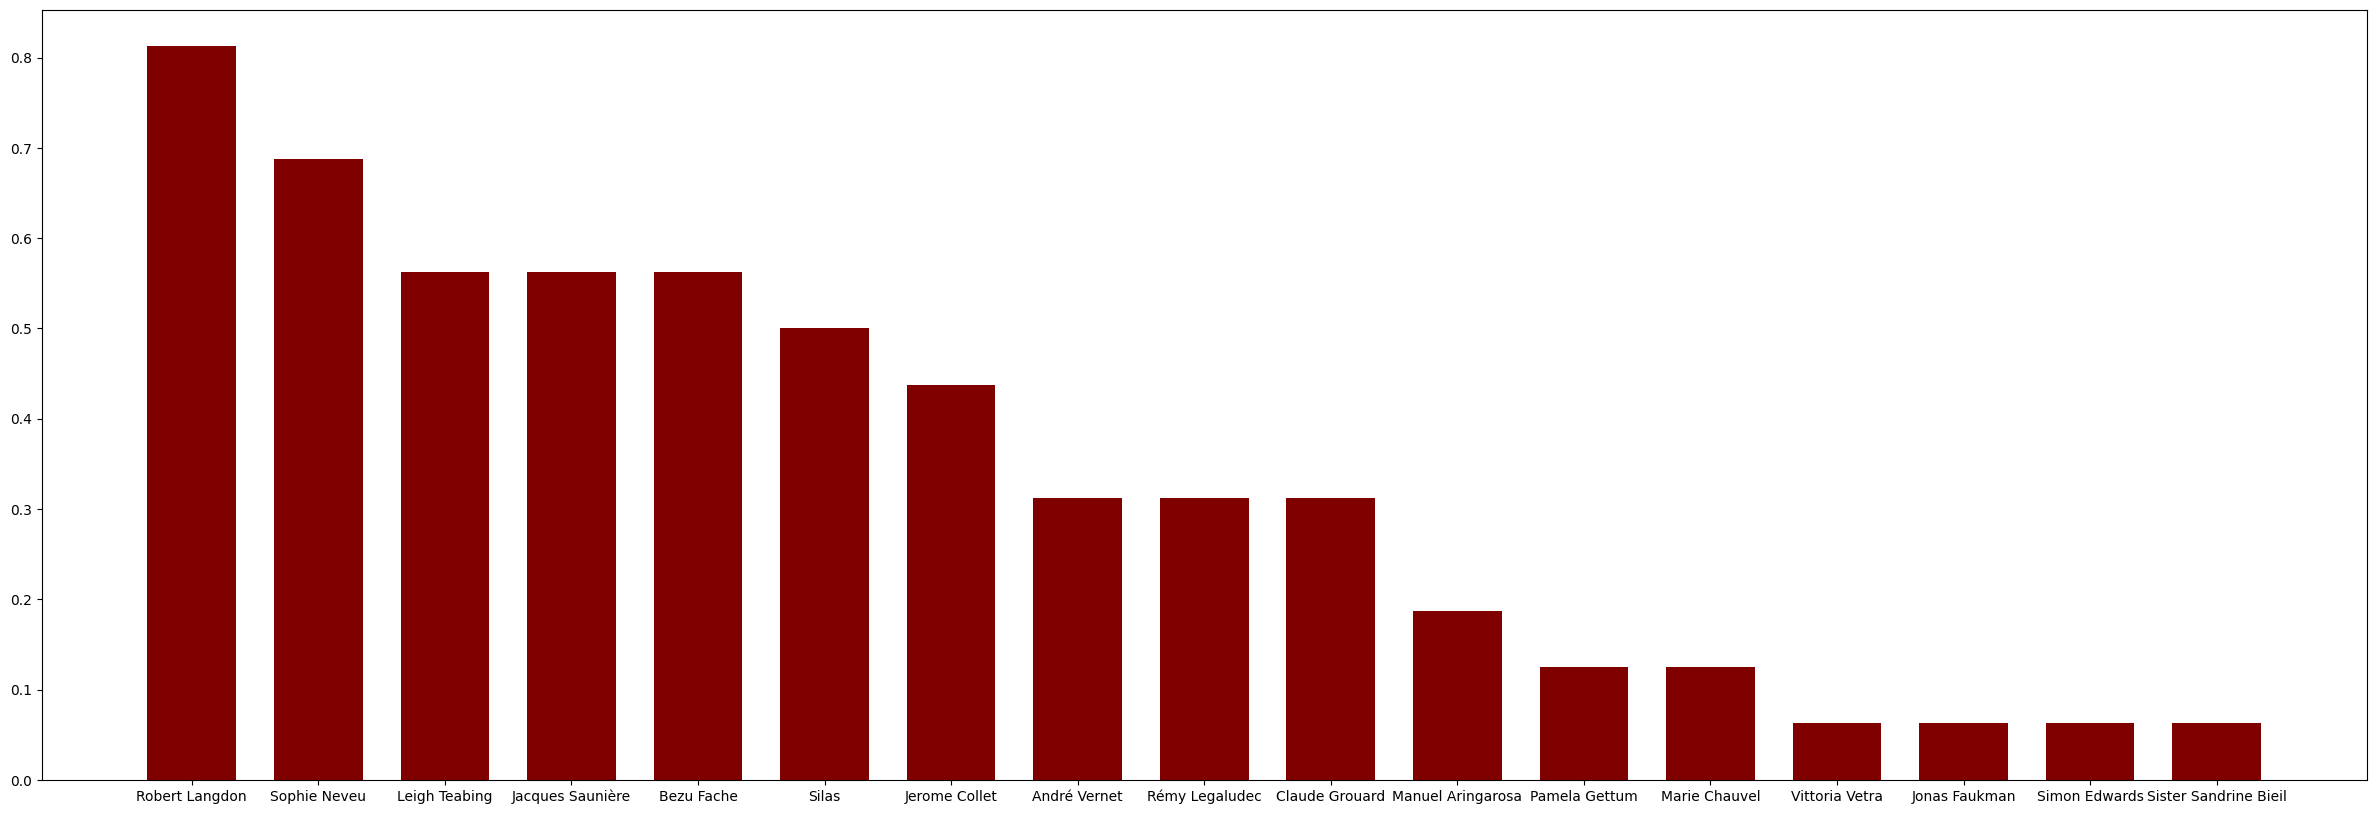

In [55]:
import matplotlib.pyplot as plt
import numpy as np
charlt = list()
for a,b in dclist:
    charlt.append(a)
values = list(dcll)
names = list(charlt)
fig = plt.figure(figsize=(30,10))
plt.bar(names,values,color="maroon",width=0.7)
plt.show()

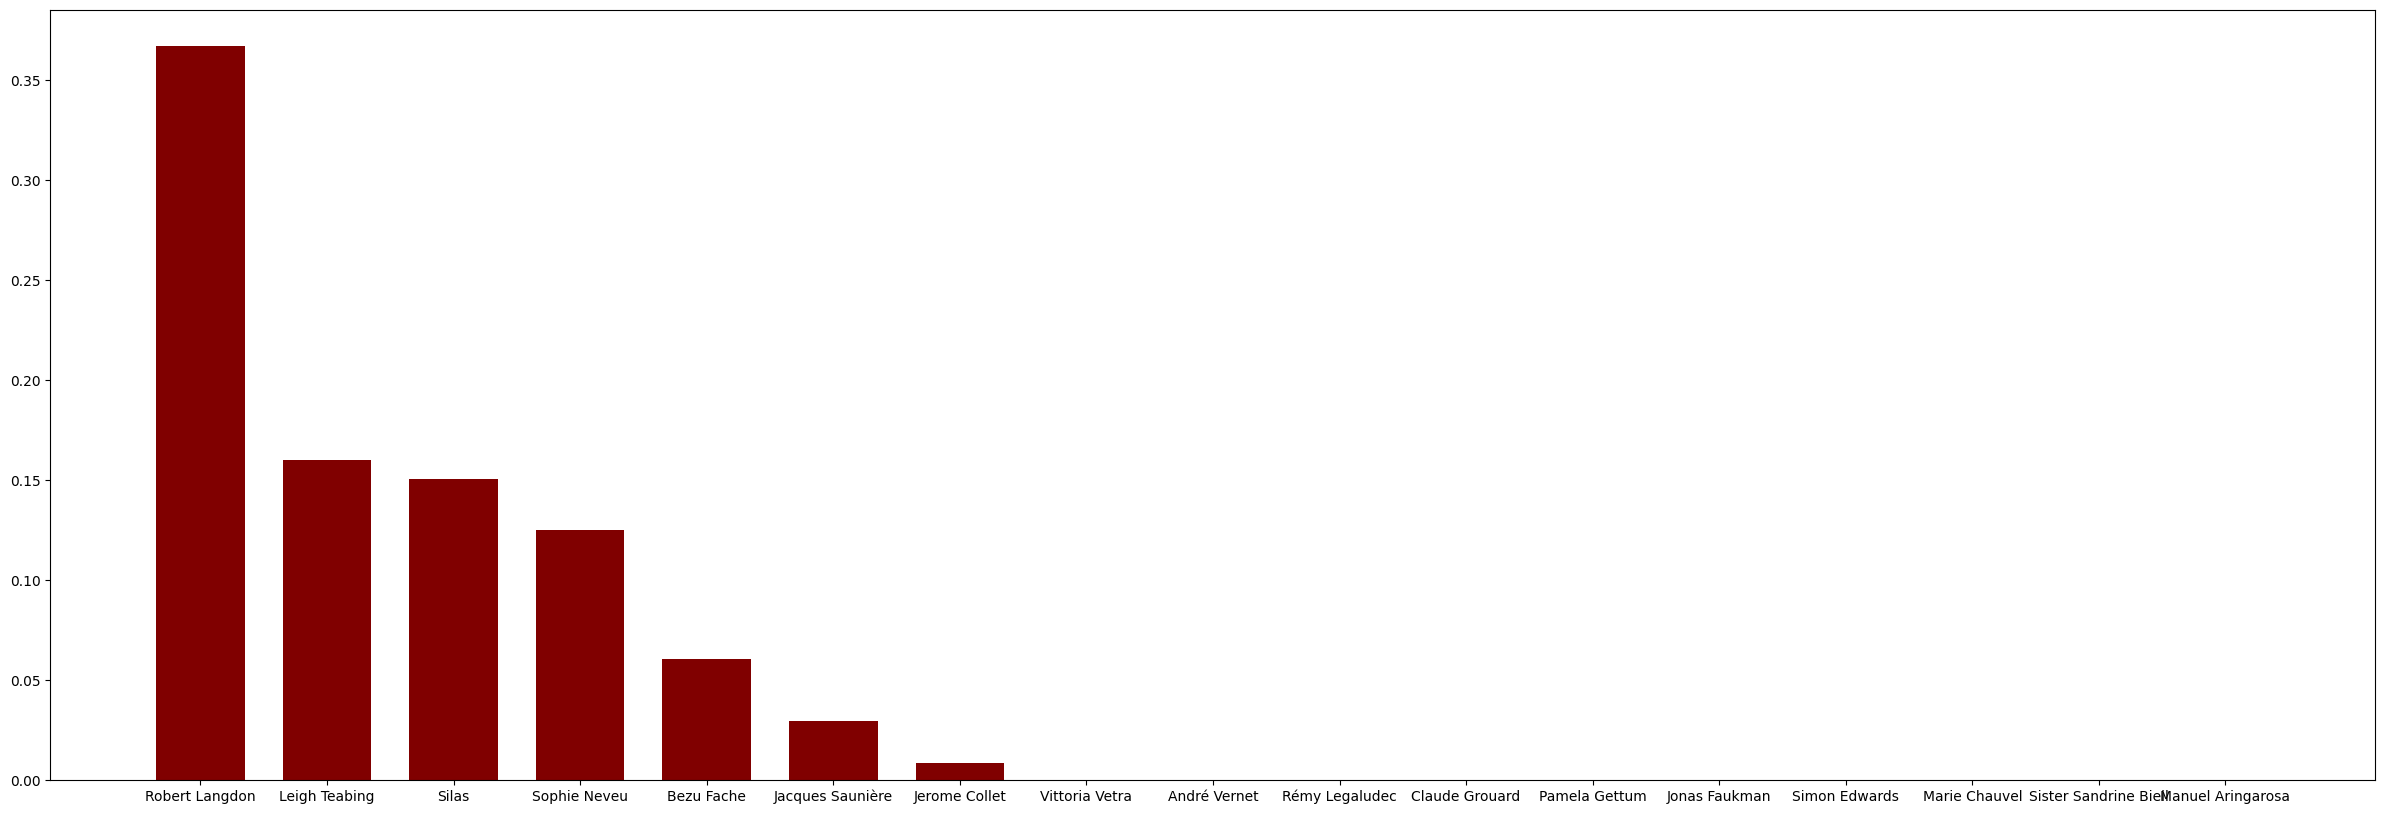

In [56]:
import matplotlib.pyplot as plt
import numpy as np
charlt = list()
for a,b in bclist:
    charlt.append(a)
values = list(bcll)
names = list(charlt)
fig = plt.figure(figsize=(30,10))
plt.bar(names,values,color="maroon",width=0.7)
plt.show()

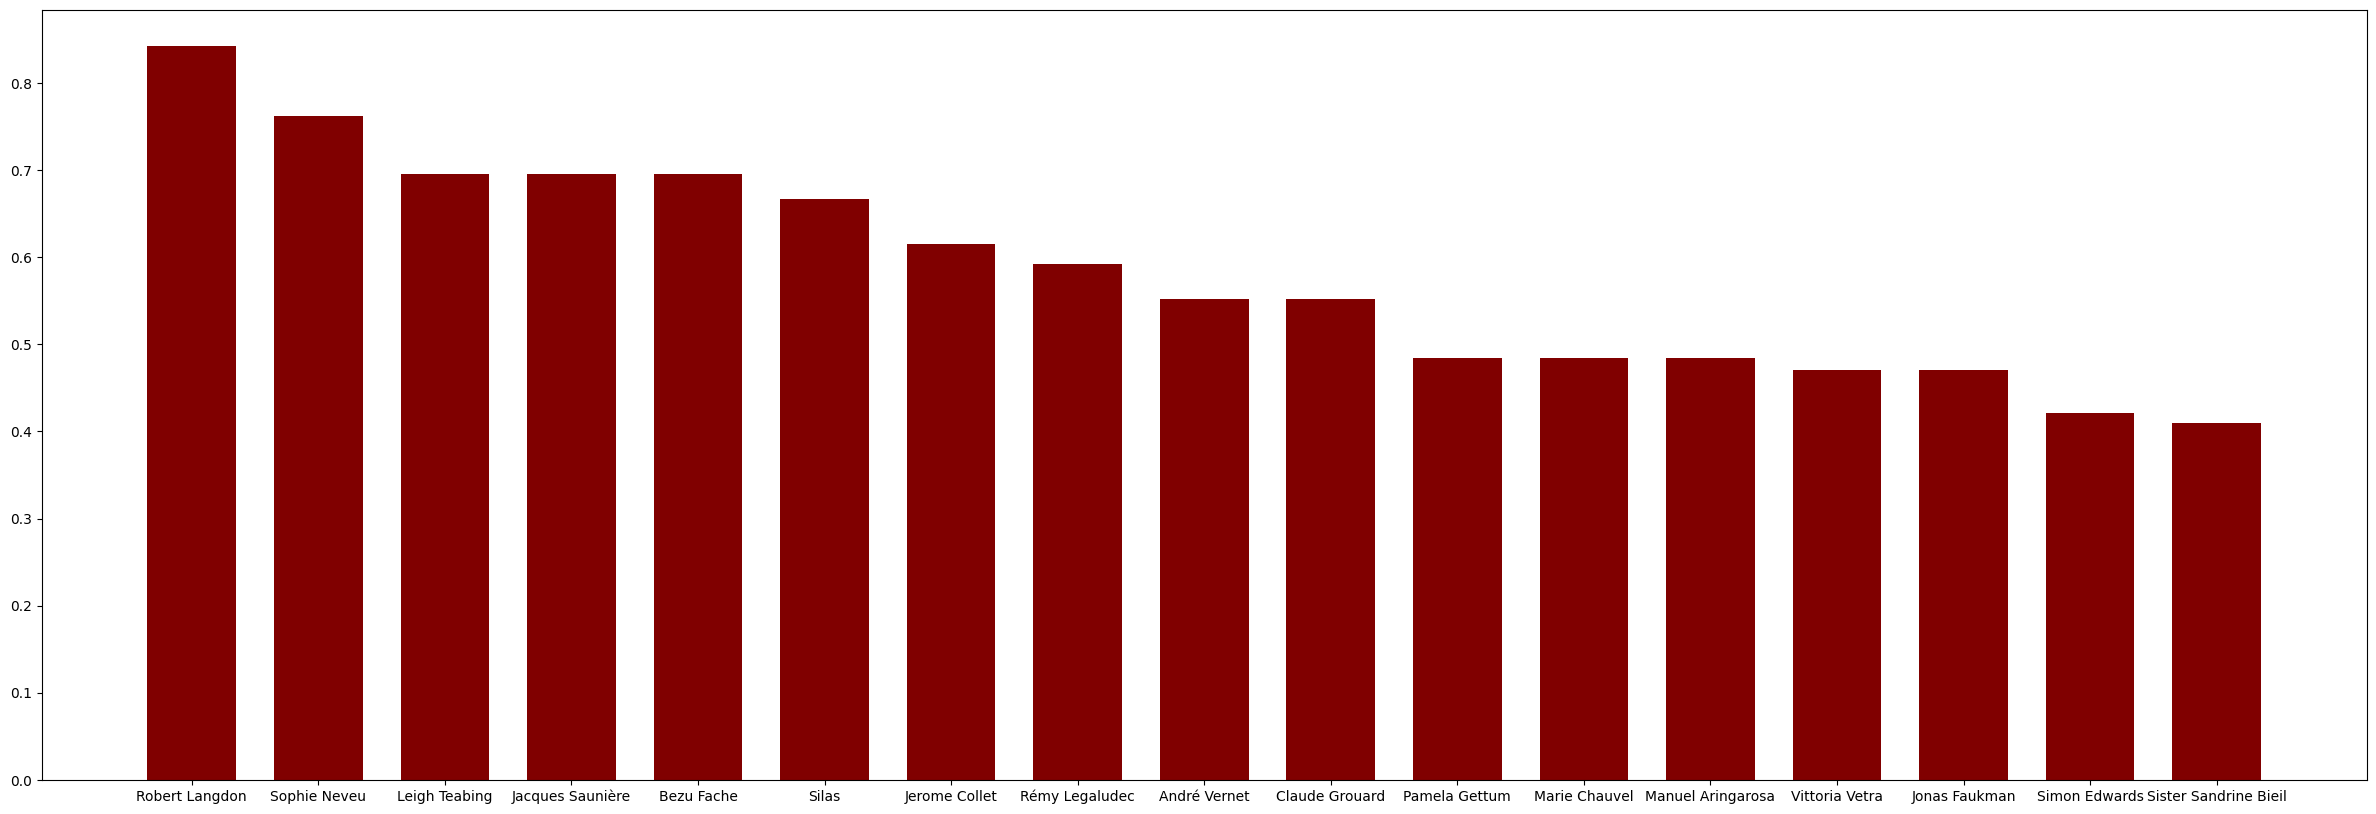

In [57]:
import matplotlib.pyplot as plt
import numpy as np
charlt = list()
for a,b in cclist:
    charlt.append(a)
values = list(ccll)
names = list(charlt)
fig = plt.figure(figsize=(30,10))
plt.bar(names,values,color="maroon",width=0.7)
plt.show()

In [87]:
### According to the above centrality graphs, the main protagonists of the graph are "Robert Langdon", "Sophie Neveu", "Leigh Teabing", "Jacques Sauniere".

#### When compared with the actual book the protagonists remain the same.

## Inferences from:
### -->clustering coefficients
### -->discovered communities
## -->extracted ego network of protagonists
### The clustering coefficients in the ego networks for both the protagonists were lowest(0.509). This means that they are very   important for the flow of information.
### -->average shortest path
## -->generative models
### From the various centralities that we calculated for the generative models we found out that the Degree centrality and closeness centrality of the generated Barabasi Albert graph and the extracted graph are similar, while the betweenness centrality of the Newman Watts Strogatz graph and our extracted graphs are similar. 


#### 